<a href="https://colab.research.google.com/github/Husnain-Saghir1997/Digital_Reticular_Chemistry/blob/main/MOF_5_Persistence_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 Step 1: Install Required Packages
!pip install pymatgen ripser scikit-tda matplotlib plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 14.6 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename

Please upload your MOF-5 .cif file


Saving 4324900.cif to 4324900 (1).cif


/usr/local/lib/python3.11/dist-packages/pymatgen/io/cif.py:1313: UserWarning: Incorrect stoichiometry:
  CIF={'C': 24.99, 'H': 15.06, 'N': 0.33, 'O': 13.705, 'Zn': 4.0}
  PMG={'Zn': 48.0, 'H': 135.72000000000014, 'C': 299.87999999999994, 'N': 3.9600000000000017, 'O': 164.45999999999998}
  ratios={'H': 9.01195219123507, 'N': 12.000000000000005, 'O': 11.999999999999998, 'Zn': 12.0, 'C': 11.999999999999998}
  if struct := self._get_structure(data, primitive, symmetrized, check_occu=check_occu):
/usr/local/lib/python3.11/dist-packages/pymatgen/core/structure.py:3107: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]


Filtered to 48 Zn atoms
Running persistent homology...


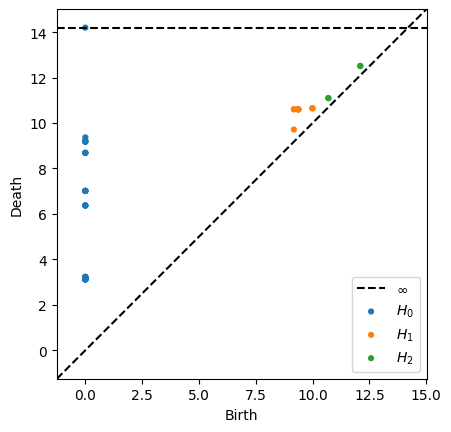

In [1]:

# 📁 Step 2: Upload Your MOF-5 CIF File
from google.colab import files
print("Please upload your MOF-5 .cif file")
uploaded = files.upload()  # e.g., "mof5.cif"

# 🧱 Step 3: Read CIF using pymatgen
from pymatgen.core import Structure
import numpy as np

# Get filename
cif_filename = list(uploaded.keys())[0]
structure = Structure.from_file(cif_filename)

# ✅ Step 4: Use only Zn atoms to avoid large computation
coords = np.array([site.coords for site in structure if site.species_string == 'Zn'])
print(f"Filtered to {len(coords)} Zn atoms")

# OPTIONAL: You can further downsample if needed
# from sklearn.utils import shuffle
# coords = shuffle(coords, random_state=42)[:100]

# 📊 Step 5: Run Persistent Homology (H0, H1, H2)
from ripser import ripser
from persim import plot_diagrams

print("Running persistent homology...")
diagrams = ripser(coords, maxdim=2)['dgms']

# 📈 Step 6: Plot Persistence Diagrams
plot_diagrams(diagrams, show=True)

# 📦 Step 7: Optional 3D Visualization
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=coords[:,0], y=coords[:,1], z=coords[:,2],
    mode='markers',
    marker=dict(size=5, color='orange')
)])
fig.update_layout(title="Zn Nodes in MOF-5", margin=dict(l=0, r=0, b=0, t=30))
fig.show()

